## Exploratory Data Visualization

Set dependencies and import data set:

In [1]:
#Load libraries
import pandas as pd

# Load data set
df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [2]:
df['Cylinders'].head()

0    4.0
1    6.0
2    4.0
3    6.0
4    6.0
Name: Cylinders, dtype: float64

What kind of data is this? numerical

In [3]:
df['Cylinders'].describe()

count    35952.000000
mean         5.765076
std          1.755268
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Cylinders, dtype: float64

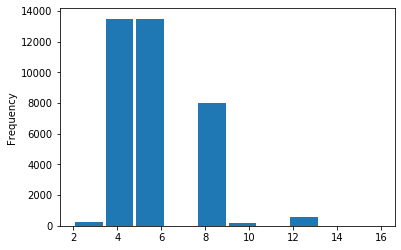

In [7]:
df['Cylinders'].plot(
    kind = 'hist',
    rwidth =0.9
)
# rwdth =0.9

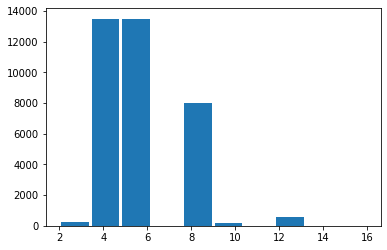

In [9]:
df['Cylinders'].hist(
    rwidth = 0.9,  
    grid = False
)
# By default the grid is True

In [16]:
len(df['Cylinders'].unique()) # How many types of cylinders do we have?

9

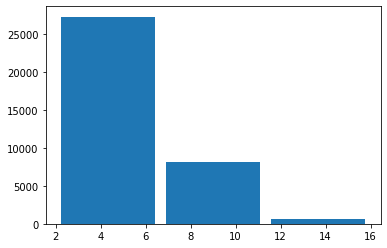

In [13]:
df['Cylinders'].hist(
    rwidth = 0.9,  
    grid = False,
    bins = 3
)

In [17]:
df['Drivetrain'].head() #Categorical data

0       2-Wheel Drive
1       2-Wheel Drive
2    Rear-Wheel Drive
3    Rear-Wheel Drive
4    Rear-Wheel Drive
Name: Drivetrain, dtype: object

In [18]:
df['Drivetrain'].describe() 

count                 35952
unique                    8
top       Front-Wheel Drive
freq                  13044
Name: Drivetrain, dtype: object

In [20]:
#df['Drivetrain'].plot(kind = 'bar')

df['Drivetrain'].value_counts() 

Front-Wheel Drive             13044
Rear-Wheel Drive              12726
4-Wheel or All-Wheel Drive     6503
All-Wheel Drive                2039
4-Wheel Drive                  1058
2-Wheel Drive                   423
Part-time 4-Wheel Drive         158
2-Wheel Drive, Front              1
Name: Drivetrain, dtype: int64

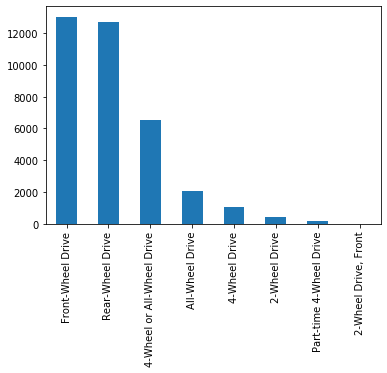

In [21]:
df['Drivetrain'].value_counts().plot(kind = 'bar') # Vertical charts

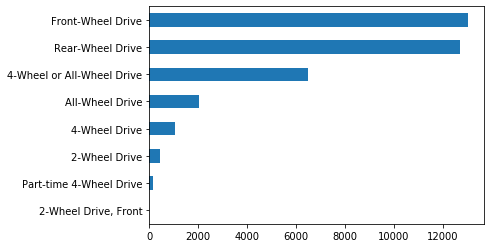

In [24]:
df['Drivetrain'].value_counts(ascending = True).plot( #We modify the data not the chart
    kind = 'barh' # Horizontal Chart
)

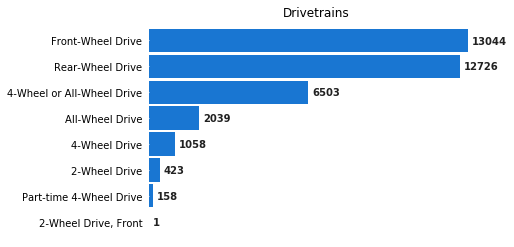

In [25]:
ax = df['Drivetrain'].value_counts(ascending = True).plot(
    kind = 'barh',
    color = '#1976d2', # Don't use multiple colors unless you have a good reason (e.g. grouped bars)
    width = 0.9 # Make the bars thicker
) 

ax.set_title("Drivetrains")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis = u'both', which = u'both', color = 'white')

# Move X values to bar ends
ax.get_xaxis().set_visible(False)
for i, val in enumerate(df['Drivetrain'].value_counts(ascending=True)):
    ax.text(val + 150, i - .125, str(val), color = '#212121', fontweight = 'bold')

## Boxplots

In [27]:
df['Combined MPG'].describe()

count    35952.000000
mean        19.929322
std          5.112409
min          7.000000
25%         16.000000
50%         19.000000
75%         23.000000
max         56.000000
Name: Combined MPG, dtype: float64

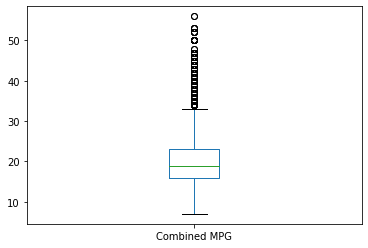

In [28]:
df['Combined MPG'].plot(kind ='box')

## Seaborn

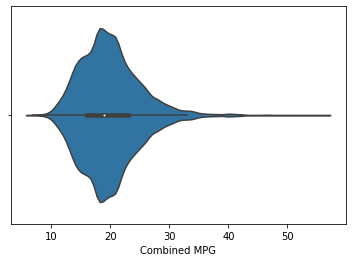

In [30]:
import seaborn as sns
sns.violinplot('Combined MPG', data = df)

## MatPlotLib

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x137a60e90>,
       dtype=object))

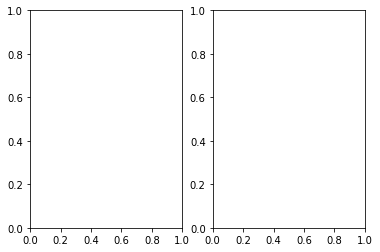

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(1,2) #n_rows, n_cols

In [39]:
mpg = df.groupby('Year')['City MPG', 'Highway MPG'].mean().reset_index()

mpg.head

<bound method NDFrame.head of     Year   City MPG  Highway MPG
0   1984  15.485271    19.075969
1   1985  17.872233    23.045541
2   1986  17.675926    22.717172
3   1987  17.414858    22.601836
4   1988  17.321716    22.686327
5   1989  17.161491    22.499556
6   1990  17.035581    22.337079
7   1991  16.837790    22.240642
8   1992  16.800361    22.439024
9   1993  17.029712    22.823584
10  1994  16.916236    22.756980
11  1995  16.599138    22.656250
12  1996  17.301173    23.584094
13  1997  17.129801    23.433113
14  1998  17.011378    23.437421
15  1999  17.019324    23.356280
16  2000  16.962515    23.193470
17  2001  16.954545    23.121951
18  2002  16.783559    22.960458
19  2003  16.686654    22.756286
20  2004  16.732255    23.046721
21  2005  16.834775    23.275952
22  2006  16.617834    23.039126
23  2007  16.605684    23.083481
24  2008  16.833615    23.399493
25  2009  17.337278    24.027050
26  2010  18.117329    24.979242
27  2011  18.395018    25.239324
28  2012  18.

In [40]:
trend = mpg.query(f"Year == {mpg['Year'].min()} or Year == {mpg['Year'].max()}")

trend

,Year,City MPG,Highway MPG
0,1984,15.485271,19.075969
33,2017,20.336056,27.651109


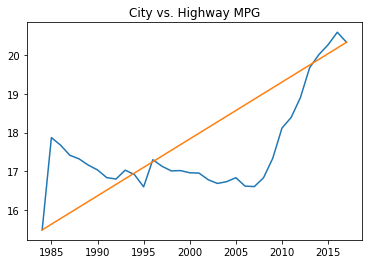

In [58]:
plt.title("City vs. Highway MPG")
plt.plot(
    mpg['Year'],
    mpg['City MPG']
)
plt.plot(
    trend['Year'],
    trend['City MPG'])

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1359ed990>,
       dtype=object))

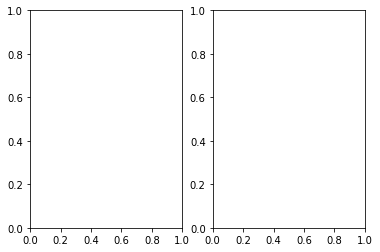

In [42]:
plt.subplots(1,2) # n_rows, n_cols

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'Highway MPG')

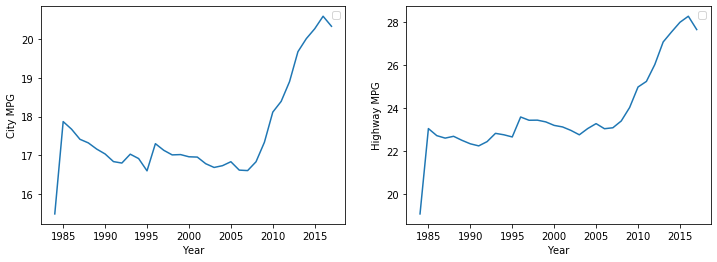

In [57]:
fig, axs = plt.subplots(
    1,
    2,
    figsize = (12,4)
)


axs[0].plot(
    mpg['Year'], # x Axis
    mpg['City MPG'] # y axis
)
axs[1].plot(
    mpg['Year'], # x Axis
    mpg['Highway MPG'] # y axis
)

axs[0].legend()
axs[1].legend()


axs[0].set_xlabel('Year')
axs[0].set_ylabel('City MPG')

axs[1].set_xlabel('Year')
axs[1].set_ylabel('Highway MPG')

No handles with labels found to put in legend.


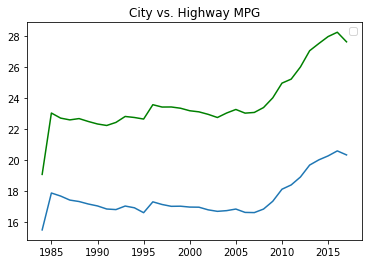

In [59]:
plt.title("City vs. Highway MPG")

plt.plot(
    mpg['Year'],
    mpg['Highway MPG'],
    color = 'green'
)
plt.plot(
    mpg['Year'], # x axis
    mpg['City MPG'] # y axis
)

plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'Highway MPG')

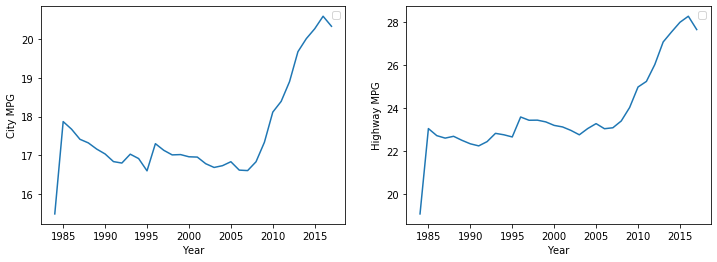

In [61]:
fig, axs = plt.subplots(
    1, # ncols
    2, # nrows
    figsize = (12, 4)
)

fig.sca(axs[0]) # Call .sca() on the Figure object to set
plt.plot(
    mpg['Year'], # x axis
    mpg['City MPG'] # y axis
)
plt.legend()
plt.xlabel('Year') # Not .set_xlabel() !!!
plt.ylabel('City MPG')

fig.sca(axs[1])
plt.plot(
    mpg['Year'],
    mpg['Highway MPG']
)
plt.legend()
plt.xlabel('Year') # Not .set_xlabel() !!!
plt.ylabel('Highway MPG')